In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv ("Amenity_final.csv",encoding='unicode_escape')
df.head(5)

Company Article Date             Event Type        eventNode  \
0     AMD     5/1/2008  Governance Commentary       Management   
1     AMD     5/1/2008          Human Capital              Pay   
2     AMD     5/1/2008          Human Capital  WorkEnvironment   
3     AMD     5/1/2008          Human Capital            Hours   
4     AMD     5/1/2008        Product Quality       Technology   

   GlassdoorSection REVIEWDATE  overallScore  workLifeScore  \
0  Managementadvice   5/1/2008           5.0            5.0   
1              Pros   5/1/2008           5.0            5.0   
2              Pros   5/1/2008           5.0            5.0   
3              Pros   5/1/2008           5.0            5.0   
4              Pros   5/1/2008           5.0            5.0   

   compensationScore  managementScore  ...  recommends  ceo_opinion  \
0                4.0              5.0  ...          No  Disapproves   
1                4.0              5.0  ...         Yes  Disapproves   
2                4.0              5.0  ...         Yes  Disapproves   
3                4.0              5.0  ...         Yes  Disapproves   
4                4.0              5.0  ...         Yes  Disapproves   

                ESG   subtheme  employeestatus employeeReviewID  \
0               NaN        NaN          former             2245   
1                 1   Benefits          former             2245   
2  Work environment  Retention          former             2245   
3             Hours        NaN          former             2245   
4               NaN        NaN          former             2245   

                                               Other        Extraction  \
0                          {ORG:"Amenity Analytics"}        management   
1  {POSWORDS:"Great", ORG:"Amenity Analytics", PR...         Great pay   
2  {ORG:"Amenity Analytics", POSWORDS:"flexible",...  work environment   
3  {POSWORDS:"flexible", ORG:"Amenity Analytics",...    flexible hours   
4  {PRODUCT:"Technology", ORG:"Amenity Analytics"...        technology   

  Polarity                                           Sentence  
0      NEG  I think my biggest piece of advice for managem...  
1      POS  Great pay from what I've been able to determin...  
2      POS  There's a relaxed work environment with very f...  
3      POS  There's a relaxed work environment with very f...  
4      POS  Great pay from what I've been able to determin...  

[5 rows x 25 columns]

In [3]:
df1= df[['Sentence','Polarity']]
df1.head(5)

Sentence Polarity
0  I think my biggest piece of advice for managem...      NEG
1  Great pay from what I've been able to determin...      POS
2  There's a relaxed work environment with very f...      POS
3  There's a relaxed work environment with very f...      POS
4  Great pay from what I've been able to determin...      POS

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249360 entries, 0 to 249359
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Sentence  249358 non-null  object
 1   Polarity  249360 non-null  object
dtypes: object(2)
memory usage: 3.8+ MB


In [5]:
df1 = df1.astype({"Sentence": object, "Polarity": str})

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249360 entries, 0 to 249359
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Sentence  249358 non-null  object
 1   Polarity  249360 non-null  object
dtypes: object(2)
memory usage: 3.8+ MB


In [7]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [19]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

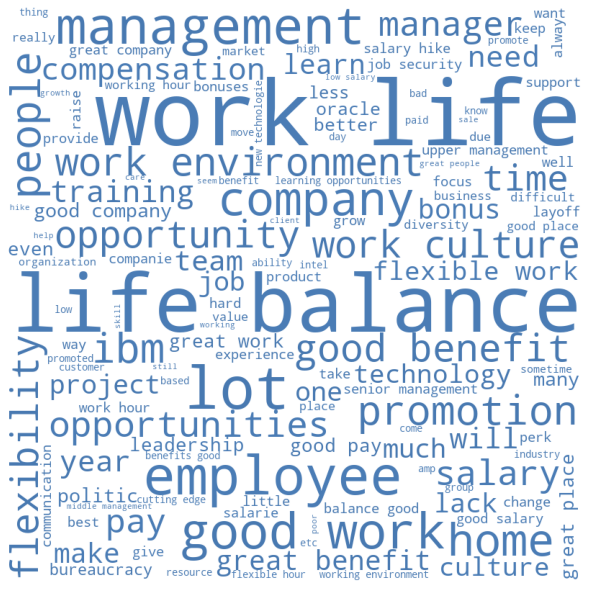

In [27]:
comment_words = ''
stopwords = set(STOPWORDS)
  
for val in df.Sentence:
      
    val = str(val)
  
    tokens = val.split()
      
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
    
def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(212,42%%, %d%%)" % np.random.randint(49,51))
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
wordcloud.recolor(color_func = grey_color_func)
                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [8]:
df1.shape

(249360, 2)

In [9]:
df1= df1.sample(frac=.25)

In [10]:
df1.shape

(62340, 2)

In [11]:
df1['Polarity'].value_counts()

POS    32158
NEG    30182
Name: Polarity, dtype: int64

In [12]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df1['Polarity']= label_encoder.fit_transform(df1['Polarity']) 

In [13]:
df1.head(5)
# 0= NEG
# 1= POS

Sentence  Polarity
35628                    Micro management and that is all         0
200409  Better educate managers and teach them how to ...         0
77370    Good pay, not the best one in software industry.         0
59838   Constant chipping away at little things (like ...         0
98255   What this should tell you is a lack of fair co...         1

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
vectorizer = CountVectorizer(stop_words= 'english')
X = vectorizer.fit_transform(df1['Sentence'].values.astype('U'))

In [16]:
print(vectorizer.get_feature_names())
print(X.toarray())

['00', '000', '0001', '000php', '00am', '00pm', '05', '06', '07', '08', '09', '0r', '10', '100', '1000', '10000', '100k', '100m', '100rupees', '100years', '101', '105', '106', '108', '1085', '10a', '10am', '10k', '10km', '10pm', '10s', '10th', '10wks', '10yrs', '11', '110', '11g', '11pm', '12', '120', '1200', '120k', '125', '12hr', '12l', '12months', '12th', '12wks', '13', '130k', '13th', '14', '140', '144', '145', '14nm', '14th', '15', '150', '1500', '15ish', '15k', '15th', '16', '16k', '16lpa', '16month', '17', '18', '180', '1800', '180k', '18million', '18th', '18yr', '19', '1950', '1950s', '1960', '1970', '1980', '1980s', '1987', '1990', '1992', '1994', '1995', '1996', '1998', '1b', '1k', '1l', '1m', '1on1', '1q', '1s', '1st', '1yr', '20', '200', '2000', '2000s', '2001', '2002', '2005', '2006', '2008', '2009', '200k', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2080', '20eps', '20k', '20mil', '20s', '20th', '20yr', '20yrs', '21', '21st', 

# Logistic Regression

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1['Sentence'],
                                                    df1['Polarity'],test_size = 0.25)

In [18]:
count_vector = CountVectorizer()
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression 
G_logit_model= LogisticRegression(fit_intercept=True,solver='lbfgs',max_iter=90000)
G_logit_model.fit(training_data,y_train)

LogisticRegression(max_iter=90000)

In [20]:
predicted_y= Covid_logit_model.predict(testing_data)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, predicted_y)))
print('Precision score: ', format(precision_score(y_test, predicted_y)))
print('Recall score: ', format(recall_score(y_test, predicted_y)))
print('F1 score: ', format(f1_score(y_test, predicted_y)))

print(classification_report(y_test, predicted_y))

Accuracy score:  0.9002245749117741
Precision score:  0.9042619672540932
Recall score:  0.9016699900299102
F1 score:  0.9029641185647426
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7561
           1       0.90      0.90      0.90      8024

    accuracy                           0.90     15585
   macro avg       0.90      0.90      0.90     15585
weighted avg       0.90      0.90      0.90     15585



# Predicting for New Glassdoor Reviews

In [26]:
new_reviews= ['Intel is the worst place to work, the CEO sucks',
             'I will never step into the office ever again',
             'My co-workers are so rude', 
              'I love my job', 
              'There are great employee benefits and work life balance']
new_reviews_transformed= count_vector.transform(new_reviews)
prediction= G_logit_model.predict(new_reviews_transformed)
prediction

# Correctly predicted first three tweets as Negative and the last two as positive

array([0, 0, 0, 1, 1])